<a href="https://colab.research.google.com/github/jasmencoelho/Jasmen_Coelho_Portfolio/blob/main/Manual_Sobel_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
# Sobel Kernels
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

In [3]:
def convolve(image,kernel):
    # Get dimensions of image and kernel
    img_h, img_w = image.shape
    print(f"This is the dimensions of the image: {image.shape}")
    kernel_h, kernel_w = kernel.shape
    print(f"This is the dimensions of the kernel: {kernel.shape}")

    # Define padding around the image based on kernel size
    # Now we calculate the padding needed to ensure convolution operation will cover every pixel
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    # Pad the image with zeros around the border
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode = 'constant')

    # Prepare the output array for the convolved image
    print("Creating an empty array for our output")
    output = np.zeros_like(image)

    # Convolve the kernel over each pixel
    for i in range(img_h):
        for j in range (img_w):
            region = padded_image[i:i + kernel_h, j:j + kernel_w]
            # Perform element wise multiplcation and Sum the Result
            output[i, j] = np.sum(region * kernel)

    return output

/content/drive/MyDrive/data/image_pairs/milan_A.png
This is the dimensions of the image: (1024, 517)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output
This is the dimensions of the image: (1024, 517)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output


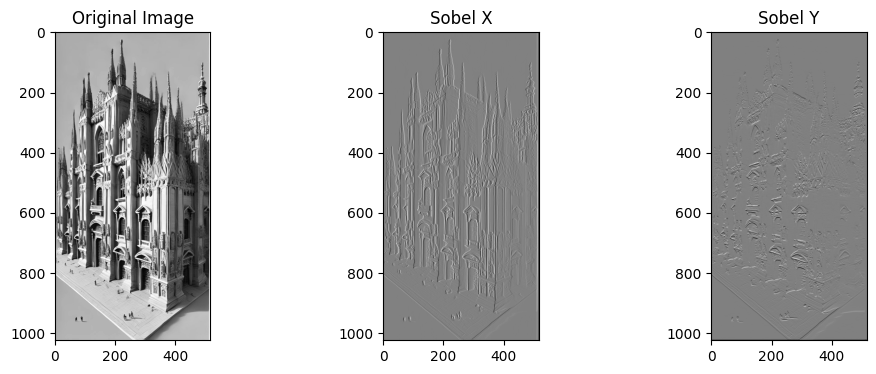

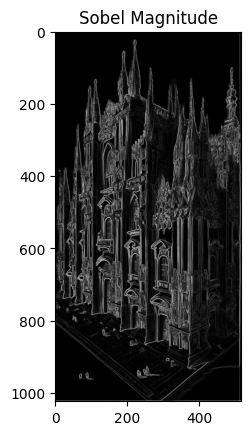

/content/drive/MyDrive/data/image_pairs/lake_B.png
This is the dimensions of the image: (507, 1024)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output
This is the dimensions of the image: (507, 1024)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output


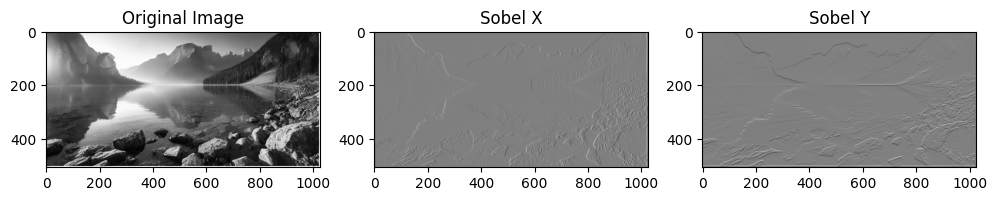

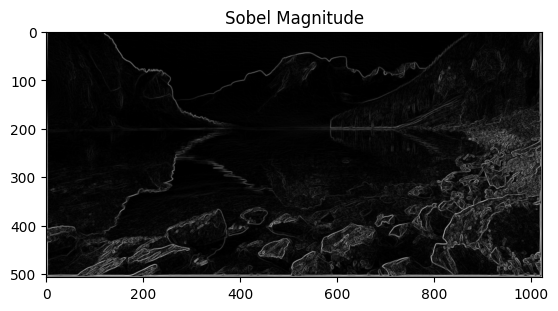

/content/drive/MyDrive/data/image_pairs/milan_B.png
This is the dimensions of the image: (1024, 515)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output
This is the dimensions of the image: (1024, 515)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output


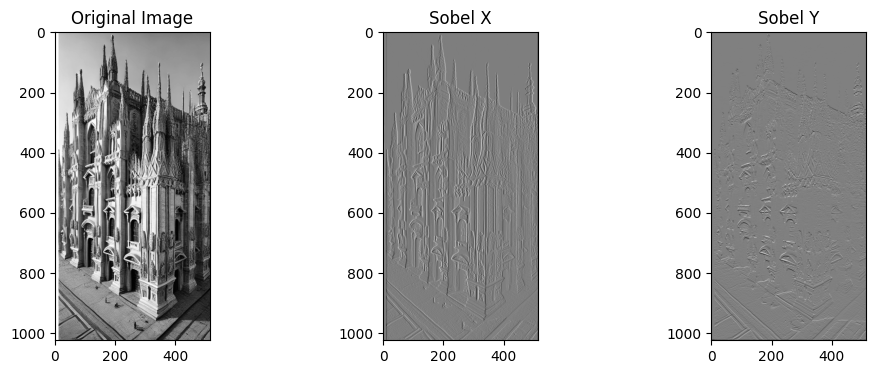

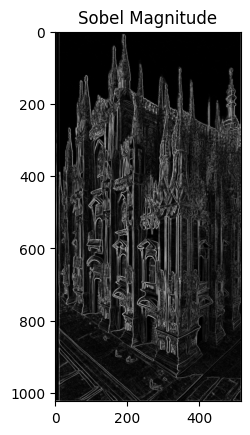

/content/drive/MyDrive/data/image_pairs/tree_A.png
This is the dimensions of the image: (1024, 497)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output
This is the dimensions of the image: (1024, 497)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output


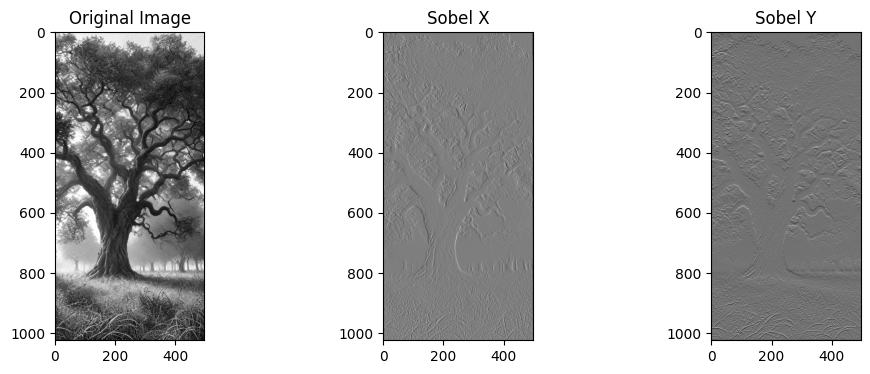

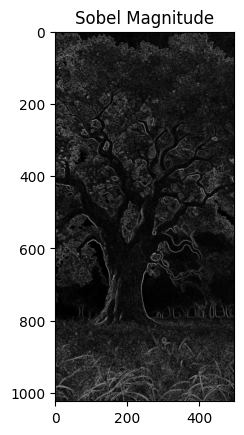

/content/drive/MyDrive/data/image_pairs/lake_A.png
This is the dimensions of the image: (515, 1024)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output
This is the dimensions of the image: (515, 1024)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output


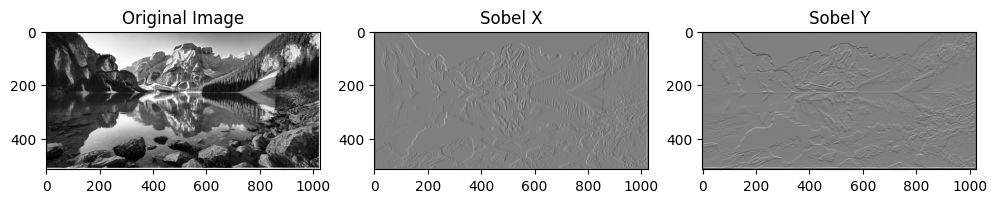

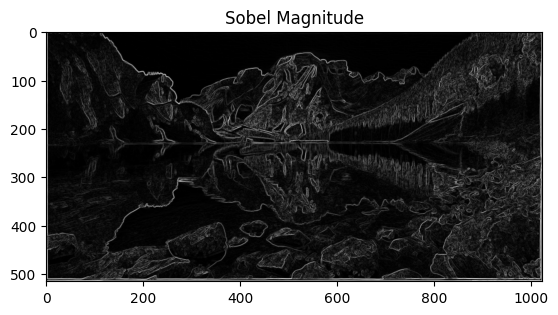

/content/drive/MyDrive/data/image_pairs/tree_B.png
This is the dimensions of the image: (1024, 504)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output
This is the dimensions of the image: (1024, 504)
This is the dimensions of the kernel: (3, 3)
Creating an empty array for our output


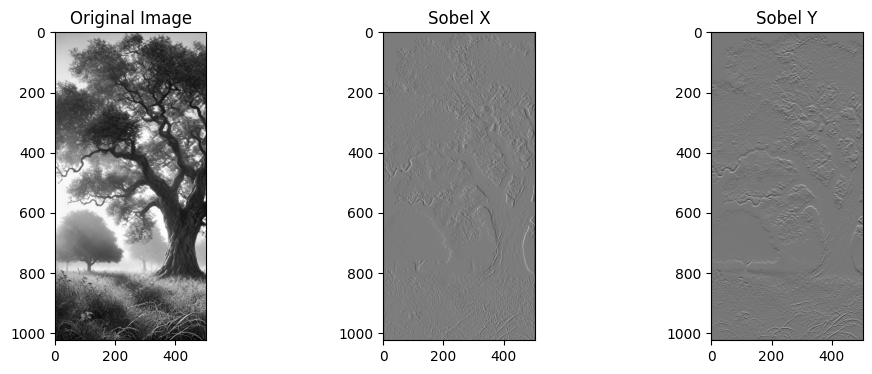

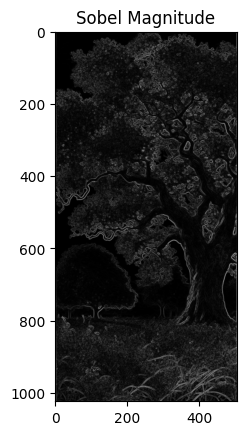

In [5]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data/image_pairs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        image = Image.open(os.path.join(dirname, filename)).convert('L') # Convert to grayscale (Luminance)
        image = np.array(image, dtype=float)
        # Apply the Sobel Kernels to the image to get the gradient
        # Applying the the Kernels to our images to get a horizontal and vertical gradient")
        Gx = convolve(image, sobel_x)
        Gy = convolve(image, sobel_y)

        # Calculate magnitude of gradients
        # Combining the horizontal and vertical gradient to capture edges in any direction
        # Using Pythagorean theorem where the horizontal and vertical gradients are the legs of the triangle and the gradient strength is the hypotenuse
        G = np.sqrt(Gx**2 + Gy**2)

        # Normalize and convert to an 8 bit integer
        G = (G / G.max()) * 255
        G = G.astype(np.uint8)

        # Display the results
        plt.figure (figsize=(12,4))
        plt.subplot(1,3,1)
        plt.title("Original Image")
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 3, 2)
        plt.title("Sobel X")
        plt.imshow(Gx, cmap='gray')
        plt.subplot(1, 3, 3)
        plt.title("Sobel Y")
        plt.imshow(Gy, cmap='gray')
        plt.figure()
        plt.title("Sobel Magnitude")
        plt.imshow(G, cmap='gray')
        plt.show()